In [1]:
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from langgraph.graph import StateGraph, START
from typing import TypedDict
import os
from dotenv import load_dotenv
load_dotenv()

# Prompt Chaining to generate blog based on topic

True

In [2]:
# Model
repo_id = "meta-llama/Llama-3.1-8B-Instruct"
endpoint = HuggingFaceEndpoint(
    repo_id= repo_id,
    max_new_tokens= 128,
    temperature= 0.3,
    huggingfacehub_api_token= os.getenv('HUGGINGFACEHUB_API_TOKEN')
)
llm = ChatHuggingFace( llm = endpoint)

e:\AI-LLMs\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# State

class BlogState(TypedDict):
    topic : str
    outline : str
    content : str

In [4]:
# Define Node/functions

def llm_outline(state: BlogState) -> BlogState:
    topic = state["topic"]
    prompt = f""" <|begin_of_text|> 
                    <|start_header_id|> system <|end_header_id|> 
                        You are blog writing assistant.
                        Generate an outline of blog based on topic
                    <|eot_id|>
                    <|start_header_id|> user <|end_header_id|>
                        {topic}
                    <|eot_id|>
                    <|start_header_id|> assistant <|end_header_id|>
                    """
    response = llm.invoke(prompt)
    state["outline"] = response.content
    return state

def llm_blog(state : BlogState) -> BlogState:
    topic = state["topic"]
    outline = state["outline"]
    prompt = f"""<|begin_of_text|>
                    <|start_header_id|> system <|end_header_id|>
                        You are blog writing assistant. Based on
                        topic and outline given, Generate a blog
                    <|eot_id|>
                    <|start_header_id|> user <|end_header_id|>
                        topic : {topic}, outline : {outline}
                    <|eot_id|>
                    <|start_header_id|> assistant <|end_header_id|>
             """
    response = llm.invoke(prompt)
    state["content"] = response.content
    return state

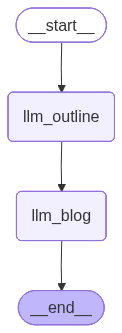

In [5]:
# Graph

graph = StateGraph(state_schema= BlogState)
graph.add_sequence([llm_outline, llm_blog])

graph.add_edge(START, "llm_outline")

workflow = graph.compile()
workflow

In [7]:
topic = input("Enter the topic of the blog : ")

init_state = {"topic": topic}

final_state = workflow.invoke(init_state)

print("----BLOG----")
print(final_state["content"])

----BLOG----
**The Joy of Felines: 10 Fascinating Facts and Trivia About Cats**

As cat lovers, we all know and adore our feline friends for their affectionate nature and adorable faces. But beyond their cute whiskers and playful pounces, cats are actually fascinating creatures that deserve our attention, care, and understanding. With over 600 million domesticated cats worldwide, it's no surprise that many of us consider them an integral part of our families.

Understanding our feline friends is essential to providing them with a happy and healthy life. By exploring their history, behavior, health, and training abilities, we can learn to appreciate their quirks and characteristics, and build stronger bonds with them.

**Cat History and Evolution**

The domestication of cats dates back to around 9,000 years ago in the Middle East. The earliest known domesticated cat fossils were found in a human grave in Cyprus. These magnificent animals were first attracted to human settlements by grai

In [11]:
print(final_state["outline"])

Here's an outline for a blog post about cats:

**Title:** "The Joy of Felines: 10 Fascinating Facts and Trivia About Cats"

**I. Introduction**

* Brief overview of the popularity of cats as pets
* Importance of understanding our feline friends
* Thesis statement: Cats are more than just adorable pets, they're fascinating creatures that deserve our attention and care.

**II. Cat History and Evolution**

* Overview of the domestication of cats
* Brief history of cat breeds and their origins
* Interesting facts about the evolution of cats, such as:
	+ The earliest known domesticated cat fossils date back to around 9,000 years ago
	+ Cats were first domesticated in the Middle East

**III. Cat Behavior and Body Language**

* Understanding cat body language: tail, ears, and eyes
* Types of cat behavior: aggressive, playful, and affectionate
* Interesting facts about cat behavior, such as:
	+ Cats have scent glands on their faces, near their whiskers
	+ Cats are highly territorial and have a

In [8]:
final_state

{'topic': 'cats',
 'outline': 'Here\'s an outline for a blog post about cats:\n\n**Title:** "The Joy of Felines: 10 Fascinating Facts and Trivia About Cats"\n\n**I. Introduction**\n\n* Brief overview of the popularity of cats as pets\n* Importance of understanding our feline friends\n* Thesis statement: Cats are more than just adorable pets, they\'re fascinating creatures that deserve our attention and care.\n\n**II. Cat History and Evolution**\n\n* Overview of the domestication of cats\n* Brief history of cat breeds and their origins\n* Interesting facts about the evolution of cats, such as:\n\t+ The earliest known domesticated cat fossils date back to around 9,000 years ago\n\t+ Cats were first domesticated in the Middle East\n\n**III. Cat Behavior and Body Language**\n\n* Understanding cat body language: tail, ears, and eyes\n* Types of cat behavior: aggressive, playful, and affectionate\n* Interesting facts about cat behavior, such as:\n\t+ Cats have scent glands on their faces, ne